### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [9]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [12]:
# Print a high level summary of the dataset
#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [14]:
# The column "car" seems particularly problematic as it only has 108 non-null values, while other columns have 12,000+
#
# Print the unique values in the 'car' column to see if we identify any other pattern of this column.
#
data["car"].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [16]:
# The column "car" seems particularly problematic as it only has 108 non-null values, while other columns have 12,000+
#
# Print the row count for each of the values of 'car'
#
data.groupby("car")[['Y']].count()

,Y
car,
Car that is too old to install Onstar :D,21
Mazda5,22
Scooter and motorcycle,22
crossover,21
do not drive,22


In [18]:
# Find all columns with null values. This will inform whether we need to fill in defaults or filter out records.
#
null_value_map_dataframe = data.isnull()
null_value_map_by_column_series = null_value_map_dataframe.any()
null_value_map_by_column_series_columns_with_nulls_only = null_value_map_by_column_series[null_value_map_by_column_series]
coumns_with_null_values = null_value_map_by_column_series_columns_with_nulls_only.index.tolist()

print("Columns with null values = " + str(coumns_with_null_values))


Columns with null values = ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


In [20]:
# List unique values by column. This will inform whether there are problematic or not well-formatted values.
#
for column in data.columns:
    print("Unique values for column [" + column + "] = " + str(data[column].unique()))

Unique values for column [destination] = ['No Urgent Place' 'Home' 'Work']
Unique values for column [passanger] = ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Unique values for column [weather] = ['Sunny' 'Rainy' 'Snowy']
Unique values for column [temperature] = [55 80 30]
Unique values for column [time] = ['2PM' '10AM' '6PM' '7AM' '10PM']
Unique values for column [coupon] = ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
Unique values for column [expiration] = ['1d' '2h']
Unique values for column [gender] = ['Female' 'Male']
Unique values for column [age] = ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Unique values for column [maritalStatus] = ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
Unique values for column [has_children] = [1 0]
Unique values for column [education] = ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School

3. Decide what to do about your missing data -- drop, replace, other...

In [23]:
# TODO: Decide what to do for data cleaning
#
clean_data = data.copy()

4. What proportion of the total observations chose to accept the coupon? 



In [26]:
# Use value_counts and the "normalize" argument to make the counts a proportion.
#
acceptance_pct_dataframe = clean_data[["Y"]].value_counts(normalize=True) * 100
print("Percentage of customers who accepted the coupon = " + str(round(acceptance_pct_dataframe[1],2)) + "%")


Percentage of customers who accepted the coupon = 56.84%


5. Use a bar plot to visualize the `coupon` column.

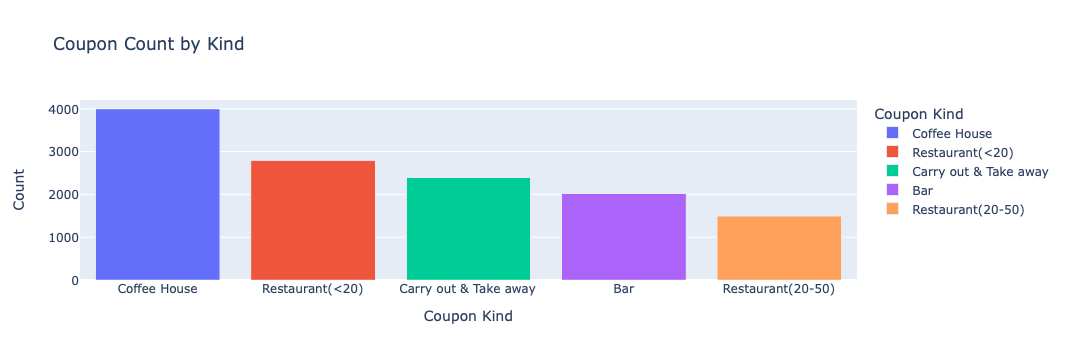

<Figure size 640x480 with 0 Axes>

In [34]:
import plotly.express as px

coupon_value_counts = clean_data["coupon"].value_counts().reset_index()

fig = px.bar(
            coupon_value_counts,
            title = "Coupon Count by Kind",
            x = "coupon",
            y = "count",
            color = "coupon",
            labels = {"coupon": "Coupon Kind", "count": "Count"})

fig.show()

plt.savefig('visualizations/coupon count by kind.png')

6. Use a histogram to visualize the temperature column.

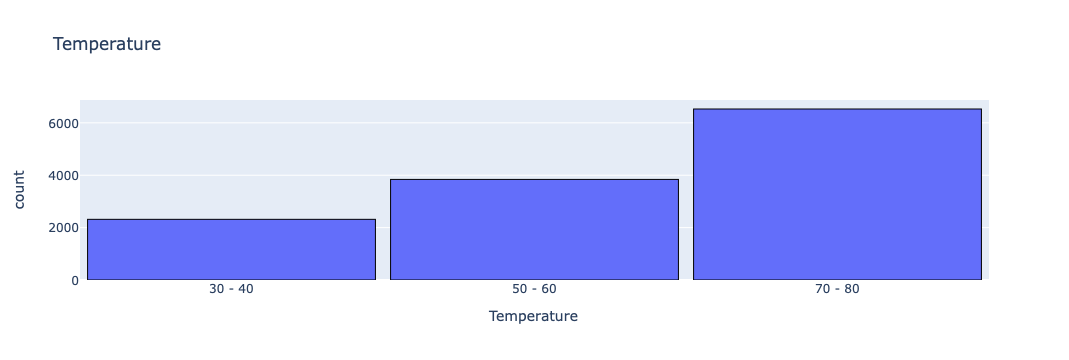

In [32]:
import plotly.express as px

labeled_temperature_dataframe = clean_data[["temperature"]].copy()


def convert_temperature_to_label(temperature):
    if (temperature < 30):
        return "0 - 30"
    elif (temperature <= 40):
        return "30 - 40"
    elif (temperature <= 50):
        return "40 - 50"
    elif (temperature <= 60):
        return "50 - 60"
    elif (temperature <= 70):
        return "60 - 70"
    elif (temperature <= 80):
        return "70 - 80"
    elif (temperature <= 90):
        return "80 - 90"
    elif (temperature <= 100):
        return "90 - 100"
    else:
        return "> 100"


labeled_temperature_dataframe["temperature_labeled"] = labeled_temperature_dataframe["temperature"].apply(convert_temperature_to_label)
labeled_temperature_dataframe_sorted = labeled_temperature_dataframe.sort_values("temperature_labeled")

fig = px.histogram(
            labeled_temperature_dataframe_sorted,
            title = "Temperature",
            x = "temperature_labeled",
            #nbins = 6,
            labels = {"temperature_labeled": "Temperature", "count": "Count"})

fig.update_traces(
    marker_line_width=1,
    marker_line_color='black')

fig.update_layout(bargap=0.05)

fig.show()

fig.write_image("visualizations/temperature_column_visualization.png")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [42]:

bar_coupons = clean_data[clean_data["coupon"] == "Bar"]
bar_coupon_value_counts = bar_coupons[["coupon","Y"]].value_counts().reset_index()

bar_coupon_value_counts

,coupon,Y,count
0,Bar,0,1190
1,Bar,1,827


2. What proportion of bar coupons were accepted?


In [45]:

# Use value_counts and the "normalize" argument to make the counts a proportion.
#
bar_coupon_acceptance_pct = bar_coupons["Y"].value_counts(normalize=True) * 100
print("Percentage of customers who accepted \"Bar\" coupons = " + str(round(bar_coupon_acceptance_pct[1],2)) + "%")


Percentage of customers who accepted "Bar" coupons = 41.0%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [48]:
# Define functions to convert column values to labels we want to use to visualize the data.
# These functions will be used across multiple cells, therefore defining them separately.
#

# Unique values for column [Y] = [1 0]
#
def create_acceptance_label(y_value):
    if y_value == 1:
        return "Accepted"
    elif y_value == 0:
        return "Not Accepted"
    else:
        return "UNKNOWN"

# Unique values for column [Bar] = ['never' 'less1' '1~3' 'gt8' nan '4~8']
#
def create_bar_visits_label(bar_visits):
    three_or_less_values = ["never", "less1", "1~3"]
    more_than_three_values = ["4~8", "gt8"]
    if bar_visits in three_or_less_values:
        return "3 OR LESS"
    elif bar_visits in more_than_three_values:
        return "4 OR MORE"
    else:
        return "UNKNOWN"


# Unique values for column [age] = ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
#

def is_convertible_to_int(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

def create_age_label(age):
    if age == "below21":
        return "21 Or Less"
    elif age == "50plus":
        return "50 or More"
    elif is_convertible_to_int(age):
        return age
    else:
        return "UNKNOWN"



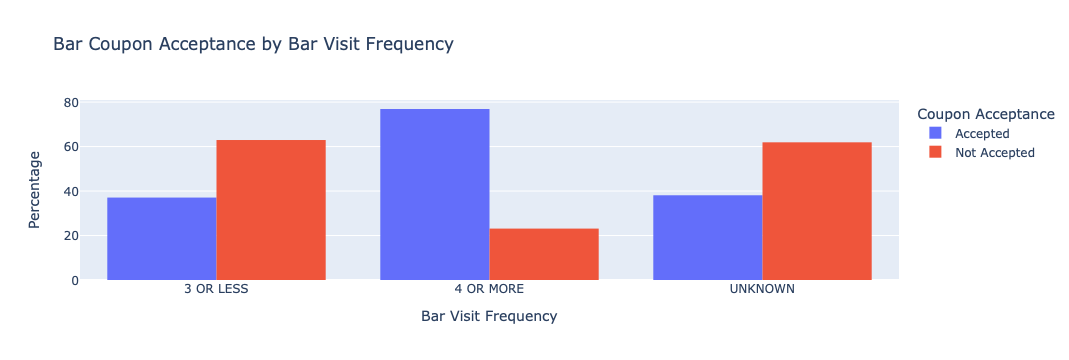

,_bar_visits,_accepted,proportion
1,3 OR LESS,Accepted,37.061770
0,3 OR LESS,Not Accepted,62.938230
2,4 OR MORE,Accepted,76.884422
3,4 OR MORE,Not Accepted,23.115578
5,UNKNOWN,Accepted,38.095238
4,UNKNOWN,Not Accepted,61.904762


In [50]:
# Start off the analysis with the complete clean dataset
#
input_dataframe = clean_data.copy()

# Create a dataframe that:
#  1. Adds a "_bar_visits" label like "3 OR LESS", "4 OR MORE"
#  2. Adds an acceptance label (0 = Not Accepted, 1 = Accepted)
#  3. Calculates value count proportions on acceptance groupbed by bar visits
#
bar_coupon_data = input_dataframe[clean_data["coupon"] == "Bar"]
bar_visits_labeled = bar_coupon_data[["Bar","Y"]].copy()
bar_visits_labeled["_bar_visits"] = bar_visits_labeled["Bar"].apply(create_bar_visits_label)
bar_visits_labeled["_accepted"] = bar_visits_labeled["Y"].apply(create_acceptance_label)
bar_visits_labeled_and_grouped_counts_pct = bar_visits_labeled.groupby("_bar_visits")[["_accepted"]].value_counts(normalize=True) * 100

bar_visits_labeled_and_grouped_counts_pct_sorted = bar_visits_labeled_and_grouped_counts_pct.reset_index().sort_values(by=['_bar_visits', '_accepted'], ascending=[True, True])

# Visualize data in a histogram (bar graph)
#
fig = px.histogram(
    bar_visits_labeled_and_grouped_counts_pct_sorted,
    title = "Bar Coupon Acceptance by Bar Visit Frequency",
    x = '_bar_visits',
    y = 'proportion',
    color = '_accepted',
    barmode ='group',
    labels = {"_bar_visits": "Bar Visit Frequency", "_accepted": "Coupon Acceptance"}
)

fig.update_layout(
    yaxis_title='Percentage'
)

fig.show()

fig.write_image("visualizations/bar_coupon_acceptance_by_bar_visit_frequency.png")

# Print out the dataframe
#
bar_visits_labeled_and_grouped_counts_pct_sorted

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


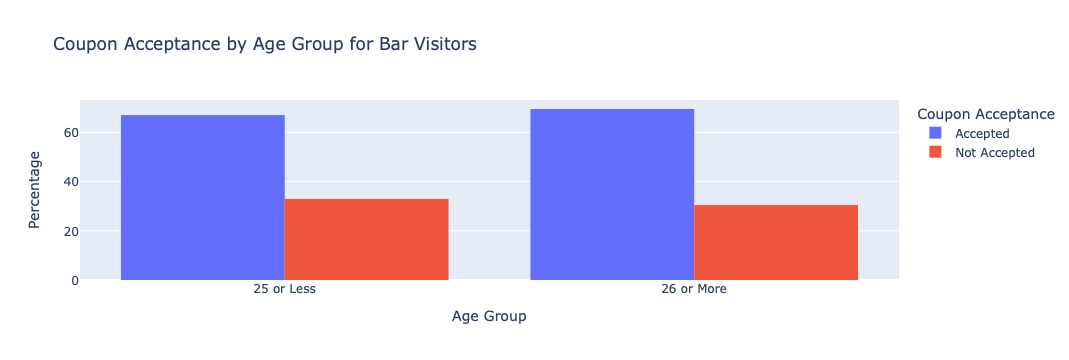

,_age_labeled,_accepted,proportion
0,25 or Less,Accepted,67.045455
1,25 or Less,Not Accepted,32.954545
2,26 or More,Accepted,69.523810
3,26 or More,Not Accepted,30.476190


In [53]:
###
### NOTE: In this interprettion of the question, all customers are bar visitors and I group them by age group within the bar visitors.
###

# Start off the analysis with the dataframe containing bar coupon rows.
#
input_dataframe = bar_coupon_data.copy()

# Create function to label age groups as "25 or Less", "26 or More", or "UNKNOWN".
#
def create_age_26plus_label(age):
    if age == "below21" or (is_convertible_to_int(age) and int(age) <= 25):
        return "25 or Less"
    elif age == "50plus" or (is_convertible_to_int(age) and int(age) > 25):
        return "26 or More"
    else:
        return "UNKNOWN"

# Create a dataframe that:
#  1. Adds an age group label
#  2. Adds an acceptance label (0 = Not Accepted, 1 = Accepted)
#  3. Calculates value count proportions on acceptance groupbed by age group
#
bar_visits_labeled = input_dataframe.query("Bar == '1~3' | Bar == '4~8' | Bar == 'gt8'")[["age","Y"]].copy()
bar_visits_labeled["_age_labeled"] = bar_visits_labeled["age"].apply(create_age_26plus_label)
bar_visits_labeled["_accepted"] = bar_visits_labeled["Y"].apply(create_acceptance_label)
bar_visits_labeled_and_grouped_counts_pct = bar_visits_labeled.groupby("_age_labeled")[["_accepted"]].value_counts(normalize=True) * 100

# Visualize data in a histogram (bar graph)
#
fig = px.histogram(
    bar_visits_labeled_and_grouped_counts_pct.reset_index(),
    title = "Coupon Acceptance by Age Group for Bar Visitors",
    x = '_age_labeled',
    y = 'proportion',
    color = '_accepted',
    barmode ='group',
    labels = {"_age_labeled": "Age Group", "_accepted": "Coupon Acceptance"}
)
    
fig.update_layout(
    yaxis_title='Percentage'
)
    
fig.show()

fig.write_image("visualizations/coupon_acceptane_by_age_for_bar_visitors.png")

# Print out the dataframe
#
bar_visits_labeled_and_grouped_counts_pct.reset_index()


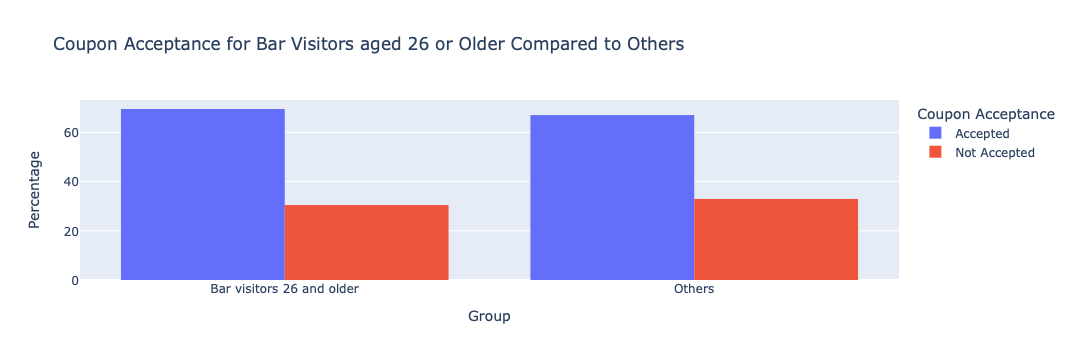

,Group,Y,_accepted,proportion
0,Bar visitors 26 and older,1,Accepted,69.523810
1,Bar visitors 26 and older,0,Not Accepted,30.476190
2,Others,1,Accepted,67.045455
3,Others,0,Not Accepted,32.954545


In [55]:
###
### NOTE: In this interprettion of the question, one group is bar visitors 26 and older, and the other group is everyone else.
###

# Start off the analysis with the dataframe containing bar coupon rows.
#
input_dataframe = bar_coupon_data.copy()

# Create function to label age groups as "25 or Less", "26 or More", or "UNKNOWN".
#
def create_age_26plus_label(age):
    if age == "below21" or (is_convertible_to_int(age) and int(age) <= 25):
        return "25 or Less"
    elif age == "50plus" or (is_convertible_to_int(age) and int(age) > 25):
        return "26 or More"
    else:
        return "UNKNOWN"

# Create a dataframe that:
#  1. Adds a label for customers in the age group and bar visit count
#  2. Adds an acceptance label (0 = Not Accepted, 1 = Accepted)
#  3. Calculates value count proportions on acceptance groupbed by age group
#
input_dataframe["_age_group"] = input_dataframe["age"].apply(create_age_26plus_label)

bar_visits_more_than_once_age_26plus = input_dataframe.query("_age_group == '26 or More' & (Bar == '1~3' | Bar == '4~8' | Bar == 'gt8')")[["Y"]].copy()
bar_visits_more_than_once_age_26plus["Group"] = "Bar visitors 26 and older"

not_bar_visits_more_than_once_age_26plus = input_dataframe.query("_age_group == '25 or Less' | (Bar == 'never' | Bar == 'less1')")[["Y"]].copy()
not_bar_visits_more_than_once_age_26plus["Group"] = "Others"

joined_dataframe = pd.concat([bar_visits_more_than_once_age_26plus, not_bar_visits_more_than_once_age_26plus])
joined_dataframe["_accepted"] = bar_visits_labeled["Y"].apply(create_acceptance_label)
joined_dataframe_grouped_pct = joined_dataframe.groupby("Group").value_counts(normalize=True) * 100

# Visualize data in a histogram (bar graph)
#
fig = px.histogram(
    joined_dataframe_grouped_pct.reset_index(),
    title = "Coupon Acceptance for Bar Visitors aged 26 or Older Compared to Others",
    x = 'Group',
    y = 'proportion',
    color = '_accepted',
    barmode ='group',
    labels = {"_age_labeled": "Age Group", "_accepted": "Coupon Acceptance"}
)
    
fig.update_layout(
    yaxis_title='Percentage'
)
    
fig.show()

fig.write_image("visualizations/coupon_acceptance_for_bar_visitors_26_or_older.png")

# Print out the dataframe
#
joined_dataframe_grouped_pct.reset_index()



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


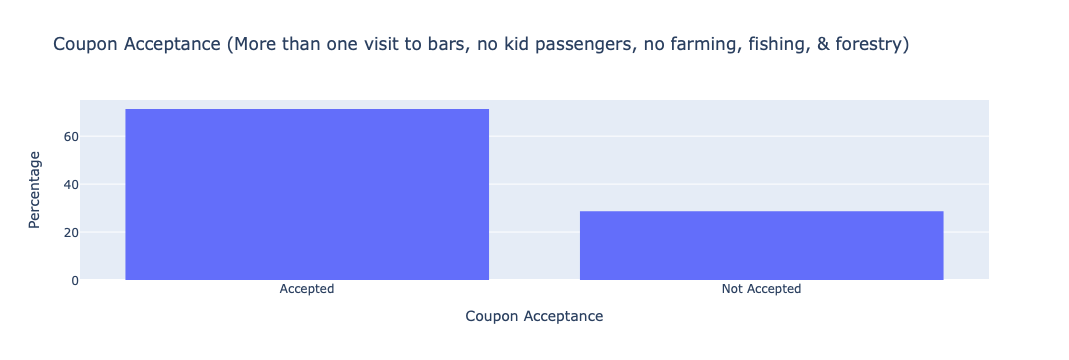

_accepted   
Accepted        71.324864
Not Accepted    28.675136
Name: proportion, dtype: float64

In [58]:

# Start off the analysis with the dataframe containing bar coupon rows.
#
input_dataframe = bar_coupon_data.copy()

# Define filter functions
#
def visits_bar_more_than_once(row):
    values_more_than_once = ["1~3", "4~8", "gt8"]
    return row["Bar"] in values_more_than_once

def had_passenger_kids(row):
    values_passenger_kids = ["Kid(s)"]
    return row["passanger"] in values_passenger_kids

def had_occupation_of_interest(row):
    values_occupations_of_interest = ["Farming Fishing & Forestry"]
    return row["occupation"] in values_occupations_of_interest

# Filter input dataset to rows containing values of interest
#
input_dataframe = input_dataframe[input_dataframe.apply(lambda x: visits_bar_more_than_once(x) and not had_passenger_kids(x) and not had_occupation_of_interest(x), axis=1)]

# Create a dataframe that adds an acceptance label (0 = Not Accepted, 1 = Accepted)
#
input_dataframe["_age_labeled"] = input_dataframe["age"].apply(create_age_26plus_label)
input_dataframe["_accepted"] = input_dataframe["Y"].apply(create_acceptance_label)
value_counts_pct = input_dataframe[["_accepted"]].value_counts(normalize=True) * 100

# Visualize data in a histogram (bar graph)
#
fig = px.histogram(
    value_counts_pct.reset_index(),
    title = "Coupon Acceptance (More than one visit to bars, no kid passengers, no farming, fishing, & forestry)",
    x = '_accepted',
    y = 'proportion',
    labels = { "_accepted": "Coupon Acceptance"}
)
    
fig.update_layout(
    yaxis_title='Percentage'
)
    
fig.show()

fig.write_image("visualizations/coupon_acceptance_bar_visitors_no_kids_no_farming.png")

value_counts_pct

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



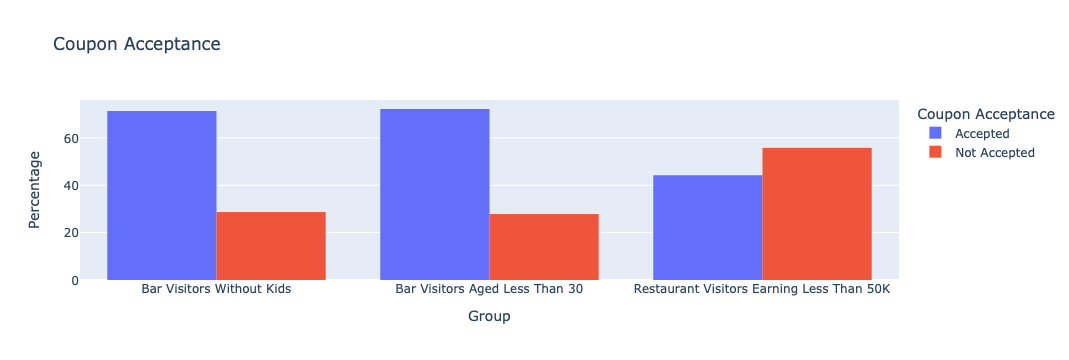

In [62]:
# Start off the analysis with the dataframe containing bar coupon rows.
#
input_dataframe = bar_coupon_data.copy()

# Define filter functions
#
def visits_bar_more_than_once(row):
    values_more_than_once = ["1~3", "4~8", "gt8"]
    return row["Bar"] in values_more_than_once

def had_passenger_kids(row):
    values_passenger_kids = ["Kid(s)"]
    return row["passanger"] in values_passenger_kids

def had_occupation_of_interest(row):
    values_occupations_of_interest = ["Farming Fishing & Forestry"]
    return row["occupation"] in values_occupations_of_interest

def is_widowed(row):
    return row["maritalStatus"] == "Widowed"

def is_aged_under_30(row):
    age = row["age"]
    return age == "below21" or (is_convertible_to_int(age) and int(age) < 30)

def goes_to_cheap_rest_4plus_times(row):
    values_more_than_4 = ["4~8", "gt8"]
    return row["RestaurantLessThan20"] in values_more_than_4

def income_less_than_50K(row):
    income = row["income"]
    return income == "Less than $12500" or income == "$25000 - $37499"

# Filter input dataset to rows containing values of interest
#
input_dataframe_bars_no_kids_widowed = input_dataframe.copy()
input_dataframe_bars_no_kids_widowed = input_dataframe_bars_no_kids_widowed[input_dataframe.apply(lambda x: visits_bar_more_than_once(x) and not had_passenger_kids(x) and not is_widowed(x), axis=1)]
input_dataframe_bars_no_kids_widowed["_accepted"] = input_dataframe_bars_no_kids_widowed["Y"].apply(create_acceptance_label)
input_dataframe_bars_no_kids_widowed_counts = input_dataframe_bars_no_kids_widowed[["_accepted"]].value_counts(normalize=True) * 100

input_dataframe_bars_no_age_lt_30 = input_dataframe.copy()
input_dataframe_bars_no_age_lt_30 = input_dataframe_bars_no_age_lt_30[input_dataframe.apply(lambda x: visits_bar_more_than_once(x) and is_aged_under_30(x), axis=1)]
input_dataframe_bars_no_age_lt_30["_accepted"] = input_dataframe_bars_no_age_lt_30["Y"].apply(create_acceptance_label)
input_dataframe_bars_no_age_lt_30_counts = input_dataframe_bars_no_age_lt_30[["_accepted"]].value_counts(normalize=True) * 100

input_dataframe_rest_4plus_income_lt_50K = input_dataframe.copy()
input_dataframe_rest_4plus_income_lt_50K = input_dataframe_rest_4plus_income_lt_50K[input_dataframe.apply(lambda x: goes_to_cheap_rest_4plus_times(x) and income_less_than_50K(x), axis=1)]
input_dataframe_rest_4plus_income_lt_50K["_accepted"] = input_dataframe_rest_4plus_income_lt_50K["Y"].apply(create_acceptance_label)
input_dataframe_rest_4plus_income_lt_50K_counts = input_dataframe_rest_4plus_income_lt_50K[["_accepted"]].value_counts(normalize=True) * 100


# Create a DataFrame
#
input_dataframe_bars_no_kids_widowed_counts = input_dataframe_bars_no_kids_widowed_counts.reset_index()
input_dataframe_bars_no_kids_widowed_counts["Group"] = "Bar Visitors Without Kids"

input_dataframe_bars_no_age_lt_30_counts = input_dataframe_bars_no_age_lt_30_counts.reset_index()
input_dataframe_bars_no_age_lt_30_counts["Group"] = "Bar Visitors Aged Less Than 30"

input_dataframe_rest_4plus_income_lt_50K_counts = input_dataframe_rest_4plus_income_lt_50K_counts.reset_index()
input_dataframe_rest_4plus_income_lt_50K_counts["Group"] = "Restaurant Visitors Earning Less Than 50K"

visualization_dataframe = pd.concat([input_dataframe_bars_no_kids_widowed_counts, input_dataframe_bars_no_age_lt_30_counts, input_dataframe_rest_4plus_income_lt_50K_counts])


# Visualize data in a histogram (bar graph)
#
fig = px.histogram(
    visualization_dataframe,
    title = "Coupon Acceptance",
    x = 'Group',
    y = 'proportion',
    color = '_accepted',
    barmode ='group',
    labels = {"_accepted": "Coupon Acceptance"}
)
    
fig.update_layout(
    yaxis_title='Percentage'
)
    
fig.show()

fig.write_image("visualizations/coupon_acceptance_bar_visitors_no_kids_vs_less_than_30_vs_restaurant_visitors_low_income.png")


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Hypothesis

Drivers are more likely to accept bar coupons if:
1. They are frequent bar visitors
2. They have no kids

Being young doesn't make a big difference given that the customer is a frequent bar visitor, so it is a less relevant variable.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

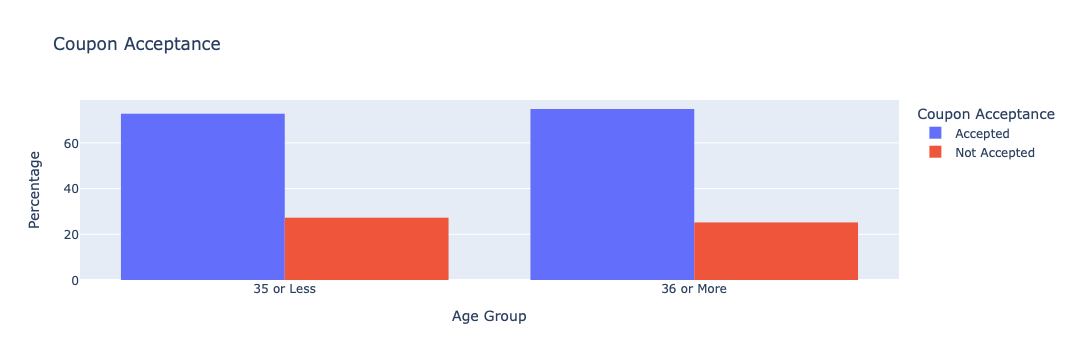

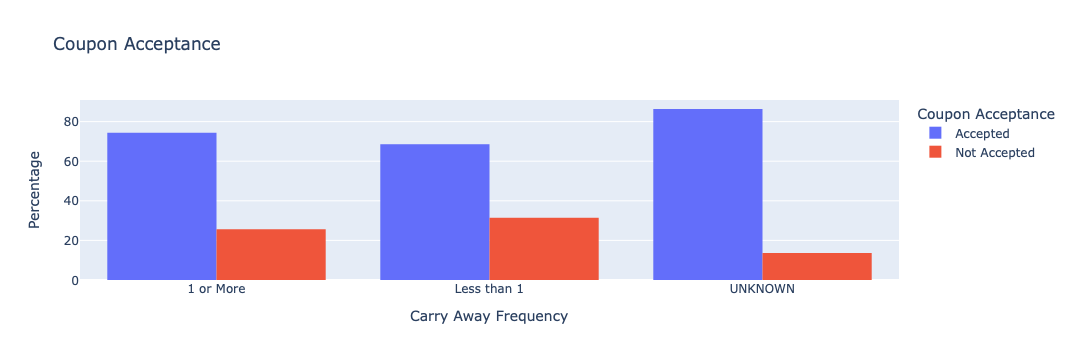

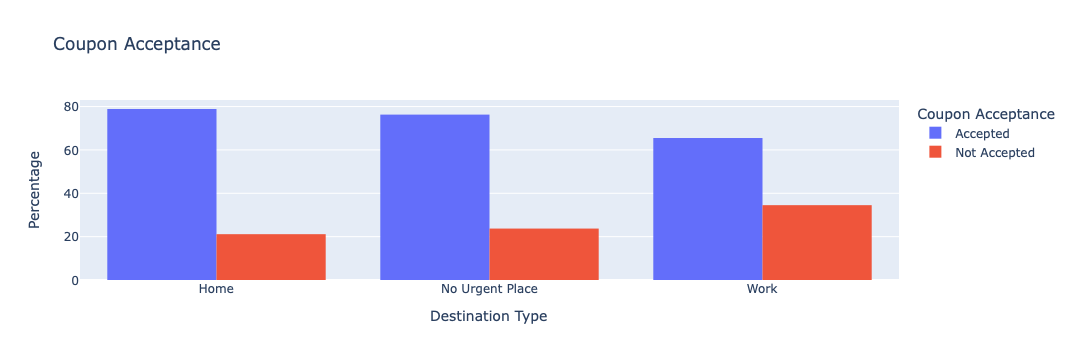

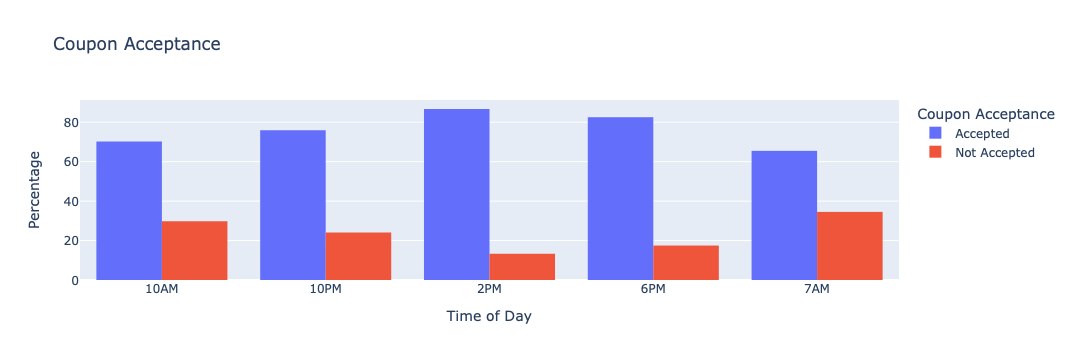

In [67]:
###
### Exploring coupon type 'Carry out & Take away'
###

input_dataframe_carry_away = clean_data.query("coupon == 'Carry out & Take away'")[["coupon", "destination", "weather", "time", "age", "CarryAway", "Y"]].copy()

def create_age_36plus_label(age):
    if age == "below21" or (is_convertible_to_int(age) and int(age) <= 35):
        return "35 or Less"
    elif age == "50plus" or (is_convertible_to_int(age) and int(age) > 35):
        return "36 or More"
    else:
        return "UNKNOWN"

def carry_away_one_or_more(value):
    one_or_more_values = ["4~8", "1~3", "gt8"]
    less_than_one_values = ["never", "less1"]
    if value in one_or_more_values:
        return "1 or More"
    elif value in less_than_one_values:
        return "Less than 1"
    else:
        return "UNKNOWN"

input_dataframe_carry_away["_age_labeled"] = input_dataframe_carry_away["age"].apply(create_age_36plus_label)
input_dataframe_carry_away["_carry_away_freq"] = input_dataframe_carry_away["CarryAway"].apply(carry_away_one_or_more)
input_dataframe_carry_away["_accepted"] = input_dataframe_carry_away["Y"].apply(create_acceptance_label)

by_age = input_dataframe_carry_away[["_age_labeled", "_accepted"]].groupby("_age_labeled").value_counts(normalize=True) * 100
by_age = by_age.reset_index()

by_carry_freq_labeled = input_dataframe_carry_away[["_carry_away_freq", "_accepted"]].groupby("_carry_away_freq").value_counts(normalize=True) * 100
by_carry_freq_labeled = by_carry_freq_labeled.reset_index()

by_destination = input_dataframe_carry_away[["destination", "_accepted"]].groupby("destination").value_counts(normalize=True) * 100
by_destination = by_destination.reset_index()

by_time = input_dataframe_carry_away[["time", "_accepted"]].groupby("time").value_counts(normalize=True) * 100
by_time = by_time.reset_index()


# Visualize data in a histogram (bar graph)
#
fig = px.histogram(
    by_age,
    title = "Coupon Acceptance",
    x = '_age_labeled',
    y = 'proportion',
    color = '_accepted',
    barmode ='group',
    labels = {"_accepted": "Coupon Acceptance"}
)
    
fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Percentage'
)

fig.show()

fig.write_image("visualizations/coupon_acceptance_carry_out_by_age.png")


fig = px.histogram(
    by_carry_freq_labeled,
    title = "Coupon Acceptance",
    x = '_carry_away_freq',
    y = 'proportion',
    color = '_accepted',
    barmode ='group',
    labels = {"_accepted": "Coupon Acceptance"}
)
    
fig.update_layout(
    xaxis_title='Carry Away Frequency',
    yaxis_title='Percentage'
)
    
fig.show()

fig.write_image("visualizations/coupon_acceptance_carry_out_by_carry_out_freq.png")

fig = px.histogram(
    by_destination,
    title = "Coupon Acceptance",
    x = 'destination',
    y = 'proportion',
    color = '_accepted',
    barmode ='group',
    labels = {"_accepted": "Coupon Acceptance"}
)
    
fig.update_layout(
    xaxis_title='Destination Type',
    yaxis_title='Percentage'
)
    
fig.show()

fig.write_image("visualizations/coupon_acceptance_carry_out_by_destination.png")

fig = px.histogram(
    by_time,
    title = "Coupon Acceptance",
    x = 'time',
    y = 'proportion',
    color = '_accepted',
    barmode ='group',
    labels = {"_accepted": "Coupon Acceptance"}
)
    
fig.update_layout(
    xaxis_title='Time of Day',
    yaxis_title='Percentage'
)
    
fig.show()

fig.write_image("visualizations/coupon_acceptance_carry_out_by_time.png")

### Hypothesis

Carry away coupons are most likely to be accepted when:
1. Going home or not going to an urgent destination
2. During the afternoon (around 2PM - 6PM)
3. Age group isn't a big factor.

For the "Carry Away Frequency", the "Unknown" bin is the most likely to accept coupons, however, the sample size for "UNKOWN" is very small, making it less statistically significant. 

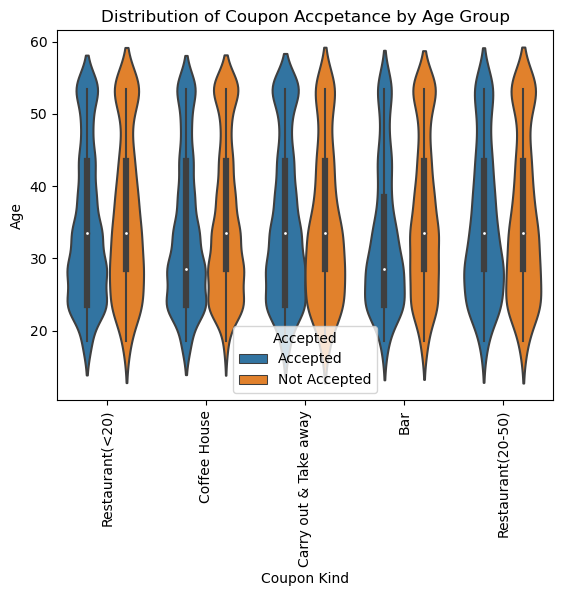

In [70]:
###
### Next, I want to analyze the distribution of age groups that accept or not accpet the coupns by coupon type
###

import plotly.express as px
import seaborn as sns

# Define a function to convert the age labels to numerical values based on the midpoint of the age group.
#
def normalize_age_to_midpoint(age):
    if age == "below21":
        #return "Below 21"
        return 18.5
    elif age == "21":
        #return "21 - 25"
        return 23.5
    elif age == "26":
        #return "26 - 30"
        return 28.5
    elif age == "31":
        #return "31 - 35"
        return 33.5
    elif age == "36":
        #return "36 - 40"
        return 38.5
    elif age == "41":
        #return "41 - 45"
        return 43.5
    elif age == "46":
        #return "46 - 50"
        return 48.5
    elif age == "50plus":
        #return "51 Plus"
        return 53.5
    else:
        return "UNKNOWN"

# Process the dataframe so that we have the rows with numerical age column and labeled Accept column
#
df_acceptance_by_age = clean_data[["coupon", "age", "Y"]].copy()
df_acceptance_by_age["Accepted"] = df_acceptance_by_age["Y"].apply(create_acceptance_label)
df_acceptance_by_age["_age"] = df_acceptance_by_age["age"].apply(normalize_age_to_midpoint)
df_acceptance_by_age = df_acceptance_by_age.reset_index()[["coupon","_age","Accepted"]]

# Visualize using a Violin Plot to get the distribution of coupons by age groups
# Use hue to visualize the accepted vs not-accepted coupons
#
ax = sns.violinplot(
    data=df_acceptance_by_age,
    x="coupon",
    y="_age",
    hue="Accepted"
)

ax.set_title("Distribution of Coupon Accpetance by Age Group")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Coupon Kind")
ax.set_ylabel("Age")

plt.savefig("visualizations/coupon_acceptance_distribution_by_age_groups.png", dpi=300)

### Hypothesis

I found the following conclusions:
1. All coupon kinds have a higher frequency count for younger age groups.
2. Coffee House and Bar coupons are more skewed toward younger age groups accepting coupons.                                              